# **SEOUL BIKE DATA**

Présentation brève de Séoul :
- capitale de la Corée du Sud
- 10 millions d'habitants
- Aire urbaine : Sudogwon, 25 millions d'habitants (6eme la plus peulée au monde)
- en 2018 : 8.4 millions de touristes
- superficie de 605.52 km2 (5.7 fois Paris)


Les transports à Séoul :
- **La marche** : il faut prendre en compte l'étendue significative de Séoul. Les distances à couvrir entre deux points d'intérêt peuvent très vite devenir problématiques.

- **Véhicule personnel** : Les séoulites se déplacent beaucoup en voiture, néanmoins, en raison du nombres d'utilisateurs, Séoul se trouve saturée par des embouteillages de jour comme de nuit. Il est dès lors difficile de prévoir avec exactitude le temps de transport d'un point A, à un point B. Par ailleurs, la pollution s'aggravant chaque année à Séoul, le gouvernement a mis en place un **système de circulation alternée pour les jours de pics de pollution**, par conséquent, la circulation en voiture est handicapée.

- **Transport en commun** : Intra-citée (Séoul dispose d'un réseau de bus très complet, doté de plus de 200 lignes, quadrillant toute la ville) et Metro (moderne et bien desservi)

- **Le vélo** : (Seoul Bike) ressemble fortement aux Vélib français. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from random import *

In [ ]:
sbdata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
sbdata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
tab = sbdata.iloc[0:6].to_html(index_names=False, escape=False)
type(tab)

str

In [ ]:
sbdata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
sbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

On va affecter 1 à Holiday et 0 no holiday

In [ ]:
sbdata['Holiday'] = [1 if x=='Holiday' else 0 for x in sbdata['Holiday'] ]

matplotlib.axes._subplots.AxesSubplot

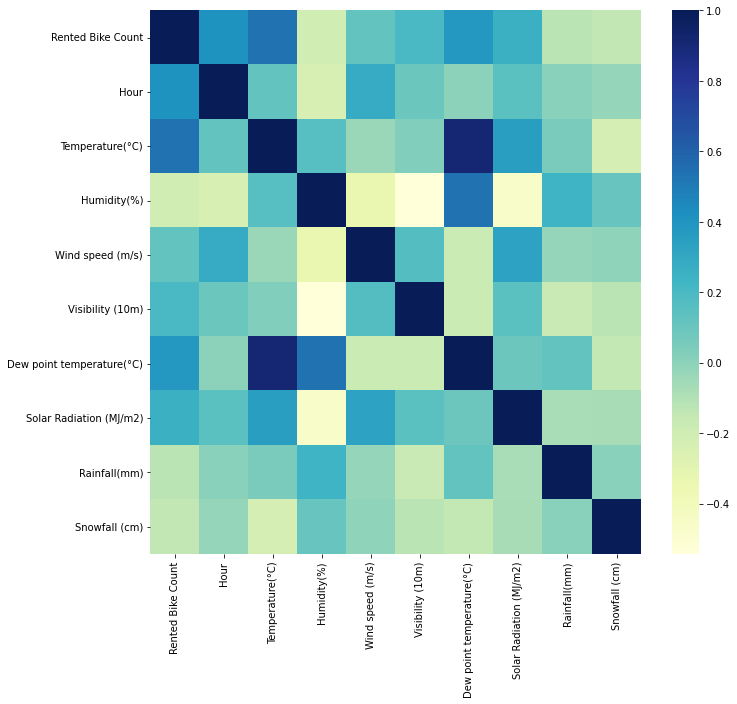

In [ ]:
fig, ax = plt.subplots(figsize=(11,10))
hmap = sns.heatmap(sbdata.corr(),cmap="YlGnBu")
type(hmap)

Avec les corrélation on constate que :
- la Température et Dew point température sont extremement corrélés (logique + il fait chaud + la température de rosée sera élevée et inversement).
- Rented Bike Count est le plus corrélé positivement avec la Température (0.54) et Hour (0.41) 

In [ ]:
sbdata_p = sbdata[['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']]
g = sns.PairGrid(sbdata_p, diag_sharey=False)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

# SEASONS

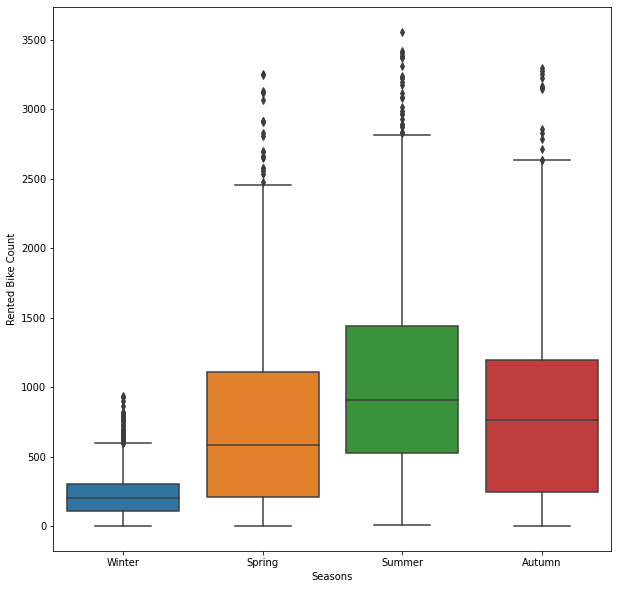

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=sbdata, x='Seasons', y='Rented Bike Count')

In [ ]:
pre_saison1 = sbdata[['Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                     'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']]
pre_saison2 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Seasons',aggfunc=sum)
#pre_saison1.head()

In [ ]:
seasons =  pre_saison1.groupby(['Seasons']).mean()
seasons['RBC total'] = pre_saison2['Rented Bike Count']
seasons

,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,RBC total
Seasons,,,,,,,,,
Autumn,14.120833,59.228480,1.494734,5.498718,0.521818,0.122756,0.056319,0.054945,1790002
Spring,13.046694,58.776721,1.874592,4.120063,0.688786,0.182880,0.000000,0.032609,1611909
Summer,26.582790,64.981431,1.609420,18.750136,0.761255,0.253487,0.000000,0.021739,2283234
Winter,-2.540463,49.744907,1.922685,-12.416667,0.298181,0.032824,0.247500,0.088889,487169


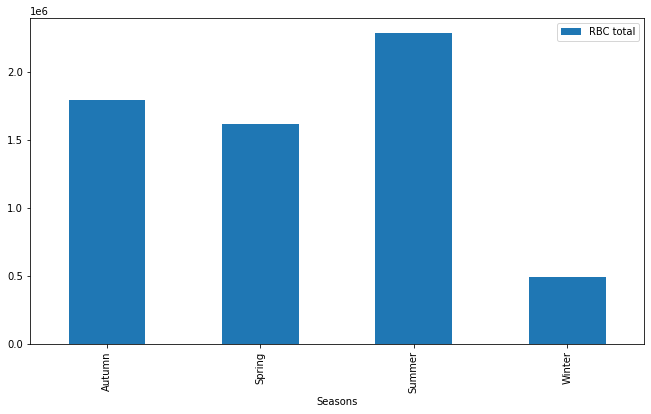

In [ ]:
#seasons.plot.pie(y='RBC total',figsize=(11, 6))
seasons.plot.bar(y='RBC total',figsize=(11, 6))

- ici on peut constater que pendant l'hivers les vélos sont clairement moins utilisés
- Summer est la saison où les vélos sont les plus utilisés

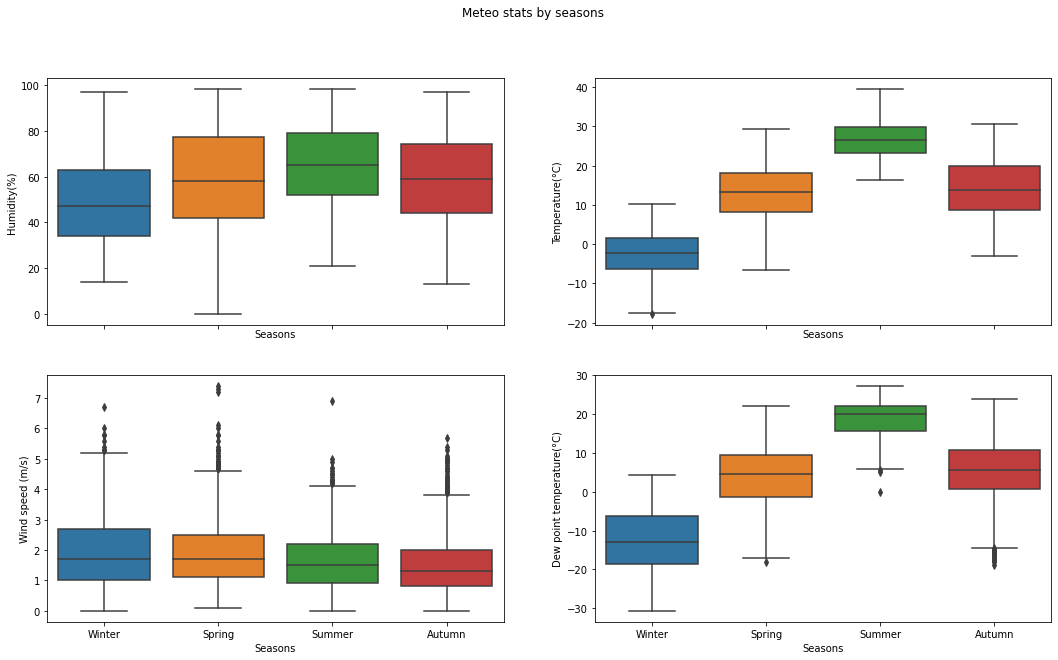

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(18, 10),sharex=True)

fig.suptitle('Meteo stats by seasons')

sns.boxplot(ax=axs[0, 0], data=sbdata, x='Seasons', y='Humidity(%)')
sns.boxplot(ax=axs[0, 1], data=sbdata, x='Seasons', y='Temperature(°C)')
sns.boxplot(ax=axs[1, 0], data=sbdata, x='Seasons', y='Wind speed (m/s)')
sns.boxplot(ax=axs[1, 1], data=sbdata, x='Seasons', y='Dew point temperature(°C)')

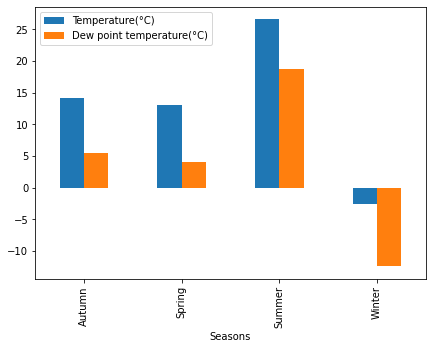

In [ ]:
seasons.plot.bar(y=['Temperature(°C)','Dew point temperature(°C)'],figsize=(7,5))

On observe ici que la température et dew point temperature ont les mêmes écarts pour les saisons (en ajoutant 10 degré à dew point on obtient la température). Cela conforte la très forte corrélation entre les 2 features

## SEASON VS HOLIDAY

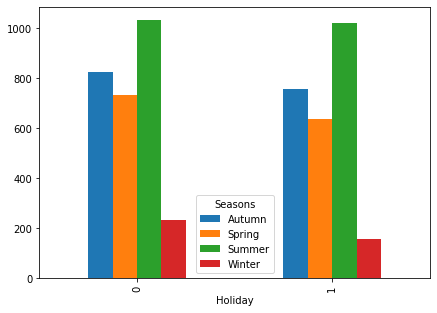

In [ ]:
RBC_saison_holiday = pd.pivot_table(sbdata,values='Rented Bike Count',index='Holiday',columns='Seasons',aggfunc=np.mean)
RBC_saison_holiday.plot.bar(figsize=(7,5))

Aucun impact des jours de 'vacances' ou 'NO vacance'

In [ ]:
pre_saison3 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Seasons',columns='Holiday', aggfunc=sum)
pre_saison3['Holiday %']=seasons['Holiday']*100
pre_saison3['RBC total']=seasons['RBC total']
pre_saison3['1 prediction']=seasons['RBC total']*seasons['Holiday']
pre_saison3['1 prediction'] = pre_saison3['1 prediction'].apply(lambda x: int(x))
pre_saison3['% difference']= (abs(pre_saison3[1]-pre_saison3['1 prediction'])/(pre_saison3[0]+pre_saison3[1]))*100
pre_saison3

Holiday,0,1,Holiday %,RBC total,1 prediction,% difference
Seasons,,,,,,
Autumn,1698984,91018,5.494505,1790002,98351,0.409664
Spring,1566167,45742,3.260870,1611909,52562,0.423101
Summer,2234171,49063,2.173913,2283234,49635,0.025052
Winter,457097,30072,8.888889,487169,43303,2.715895


Ici, avec les **% diférence** on constate que le fait que la journée soit une vacance n'impact pas le nombre de vélos loués. En effet peut importe la saison, à partir du nombre total de RBC on peut avec une simple proportion determiner le nombre de vélos loué en jour de vacances. Cela montre bien que la journée de vacance ou non n'impacte pas à l'échelle des saisons le nombre de vélos loués.

## SEASON VS FUNCTIONING DAY

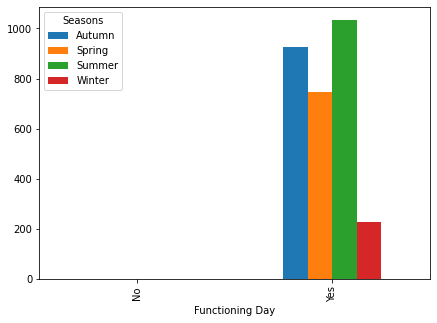

In [ ]:
RBC_saison_fday = pd.pivot_table(sbdata,values='Rented Bike Count',index='Functioning Day',columns='Seasons',aggfunc=np.mean)
RBC_saison_fday.plot.bar(figsize=(7,5))

Les jours feriés aucun vélo n'est loué à Séoul.

In [ ]:
#RBC_saison_fday
sbdata = sbdata.astype({'Functioning Day':str})
sbdata_no_fday = sbdata[sbdata['Functioning Day']=='No']
sbdata_no_fday.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday
count,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0,295.000000
mean,0.0,11.298305,16.092881,60.494915,1.696949,1521.542373,7.770169,0.604780,0.136271,0.0,0.081356
std,0.0,6.979501,4.690414,16.331779,1.094120,580.913593,4.373466,0.883754,1.203795,0.0,0.273845
min,0.0,0.000000,5.200000,21.000000,0.000000,201.000000,-7.000000,0.000000,0.000000,0.0,0.000000
25%,0.0,5.000000,12.300000,49.000000,0.900000,1055.000000,5.300000,0.000000,0.000000,0.0,0.000000
50%,0.0,11.000000,16.300000,62.000000,1.500000,1814.000000,7.800000,0.000000,0.000000,0.0,0.000000
75%,0.0,17.000000,19.350000,73.000000,2.350000,2000.000000,11.000000,1.065000,0.000000,0.0,0.000000
max,0.0,23.000000,26.500000,96.000000,5.300000,2000.000000,16.100000,3.320000,18.000000,0.0,1.000000


## SEASON VS HOUR

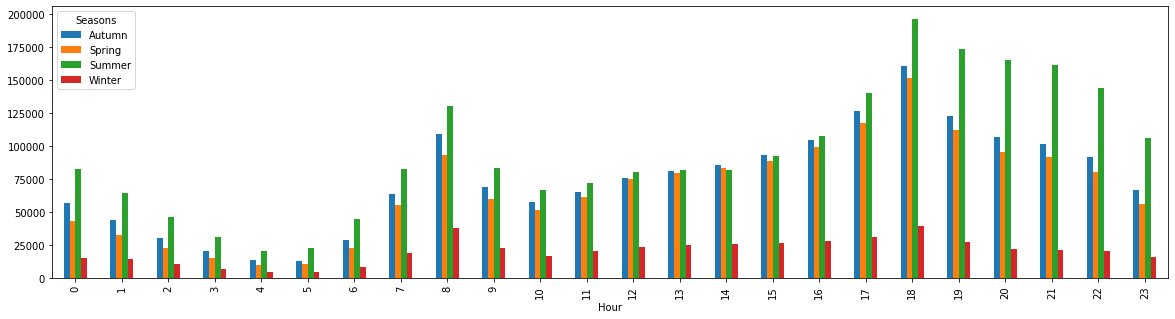

In [ ]:
RBC_saison_hours = pd.pivot_table(sbdata,values='Rented Bike Count',index='Hour',columns='Seasons',aggfunc=sum)
RBC_saison_hours.plot.bar(figsize=(20,5))

Ici on constate que l'écart de vélos loué en été est principalemement effectué en fin de journée ou durant a nuit(de 18h à 5h). Cela peut s'expliquer par la douceur des nuits à Séoul en été qui permet aux personnes de plus utiliser le vélo à ces heures là.

In [ ]:
# fonction ui va permettre de coloré le barplot en fonction de la valeur de la barre (plus lisible)
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

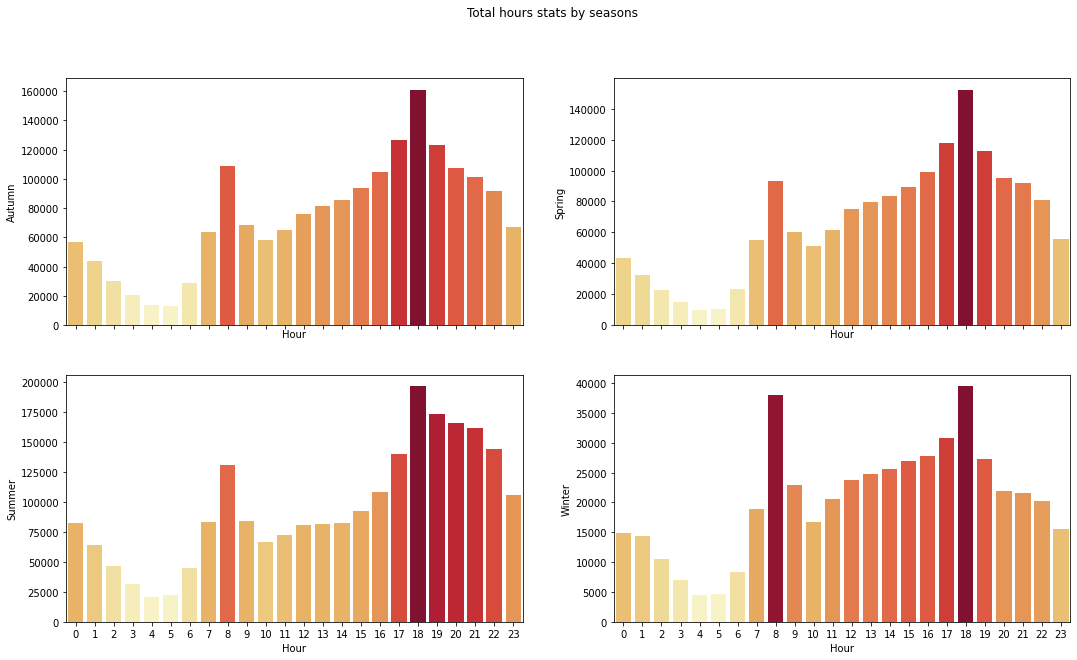

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(18, 10),sharex=True)

fig.suptitle('Total hours stats by seasons')

sns.barplot(ax=axs[0, 0], data=RBC_saison_hours, y='Autumn',x = RBC_saison_hours.index, palette=colors_from_values(RBC_saison_hours['Autumn'], "YlOrRd"))
sns.barplot(ax=axs[0, 1], data=RBC_saison_hours, y='Spring',x = RBC_saison_hours.index, palette=colors_from_values(RBC_saison_hours['Spring'], "YlOrRd"))
sns.barplot(ax=axs[1, 0], data=RBC_saison_hours, y='Summer',x = RBC_saison_hours.index, palette=colors_from_values(RBC_saison_hours['Summer'], "YlOrRd"))
sns.barplot(ax=axs[1, 1], data=RBC_saison_hours, y='Winter',x = RBC_saison_hours.index, palette=colors_from_values(RBC_saison_hours['Winter'], "YlOrRd"))


# HOURS
Ici on va observer le dataset en distinguant les 24h de la journées. On s'attend à voir des des distinctions importantes en fonctions des heures de pointes (matin,fin de journée) ou heure creuses (nuit)

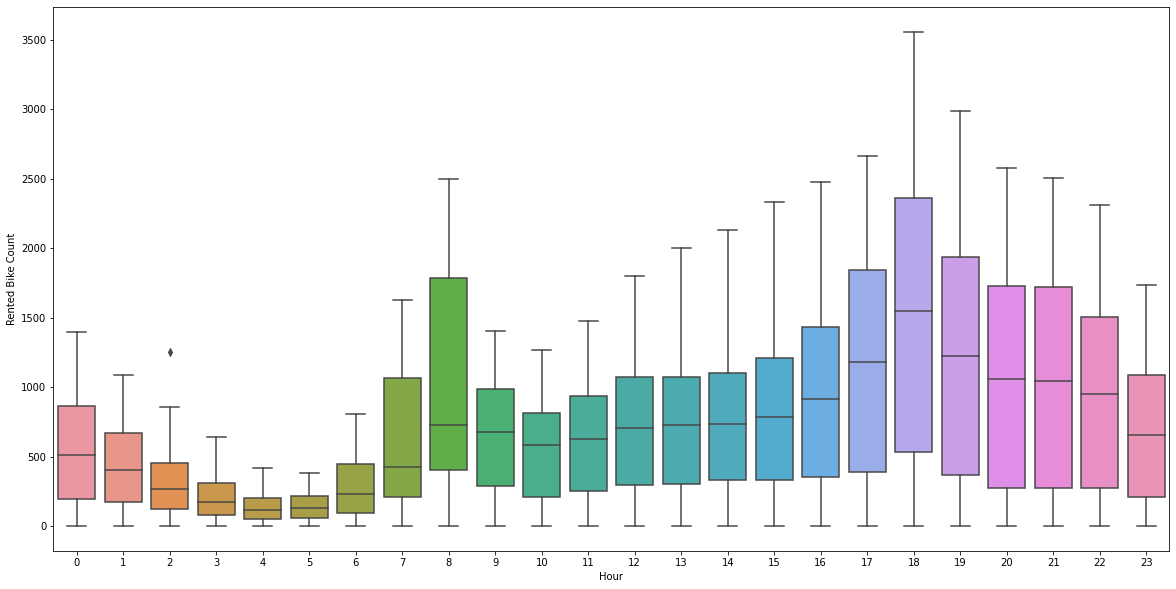

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=sbdata, x='Hour', y='Rented Bike Count')

## Migration pendulaire
déplacement journalier de la population des grands centres urbains entre les lieux de domiciles et les lieux de travail ou de scolarité. C’est le fameux métro-boulot-dodo.


In [ ]:
def filter_migration_pend(h):
    if(5<h<10) or (15<h<21):
        return 'Yes'
    else:
        return 'No'

In [ ]:
sbdata["Migration pendulaire"] = sbdata["Hour"].apply(lambda x:filter_migration_pend(int(x)))

In [ ]:
pre_hours1 = sbdata[['Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                     'Rainfall(mm)','Snowfall (cm)','Migration pendulaire']]
pre_hours2 = sbdata[['Rented Bike Count','Migration pendulaire']]  

In [ ]:
hours_1 =  pre_hours1.groupby(['Migration pendulaire']).mean()
hours_1['Rented Bike Count'] = pre_hours2.groupby(['Migration pendulaire']).sum()
hours_1['RBC%'] = (hours_1['Rented Bike Count']/hours_1['Rented Bike Count'].sum())*100
hours_1

,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,RBC%
Migration pendulaire,,,,,,,,,
No,12.824895,58.403470,1.677954,4.064237,0.658935,0.134977,0.076548,3109444,50.377282
Yes,12.979635,57.930898,1.803166,4.089772,0.419403,0.171537,0.072603,3062870,49.622718


On obsreve que les 2 lignes sont sensiblement les mêmes au niveau des données météos. De plus, la repartition de nombre total de vélos loué entre les 2h plages d'heure est égale (50-50). Les 9 heures de migrations pendulaire représente autant que les 15 autres heures de la journée.
- Dans 37.5% de la journée nous avons 50% des vélos loués.

In [ ]:
hours_1.std()

Temperature(°C)                  0.109418
Humidity(%)                      0.334159
Wind speed (m/s)                 0.088538
Dew point temperature(°C)        0.018055
Solar Radiation (MJ/m2)          0.169375
Rainfall(mm)                     0.025852
Snowfall (cm)                    0.002790
Rented Bike Count            32932.791227
RBC%                             0.533557
dtype: float64

En observant les écarts très faible des données météos moyenne ont peut conclure que l'impact de l'heure est réel. Ce n'est pas un écart important dans une autre donnée qui va expliquer la repartition inégale. C'est bien l'impact réel des migrations pendulaire !

## Matin - Après-midi -Soirée - Nuit
4 parties de la journée. Observons la repartition de cet angle :

In [ ]:
def filter_4parties(h):
    if(h < 6):
        return 'nuit'
    elif (h < 12):
        return 'matin'
    elif (h < 18):
        return 'apres-midi'
    else :
      return 'soiree'

In [ ]:
sbdata["Partie_de_la_journee"] = sbdata["Hour"].apply(lambda x:filter_4parties(int(x)))

In [ ]:
pre_hours1 = sbdata[['Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                     'Rainfall(mm)','Snowfall (cm)','Partie_de_la_journee']]
pre_hours2 = sbdata[['Rented Bike Count','Partie_de_la_journee']]

In [ ]:
hours_2 =  pre_hours1.groupby(['Partie_de_la_journee']).mean()
hours_2['Rented Bike Count'] = pre_hours2.groupby(['Partie_de_la_journee']).sum()
hours_2['RBC%'] = (hours_2['Rented Bike Count']/hours_2['Rented Bike Count'].sum())*100
hours_2.sort_values('RBC%',ascending=False)

,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,RBC%
Partie_de_la_journee,,,,,,,,,
soiree,13.277260,58.150685,1.845251,4.600274,0.089594,0.173973,0.058037,2333230,37.801544
apres-midi,16.453653,45.331050,2.360457,3.565434,1.513849,0.131963,0.064749,1857788,30.098728
matin,11.319132,61.952511,1.441735,3.719772,0.673000,0.174292,0.103607,1344634,21.784925
nuit,10.481644,67.470776,1.252192,4.409772,0.000000,0.114521,0.073881,636662,10.314803


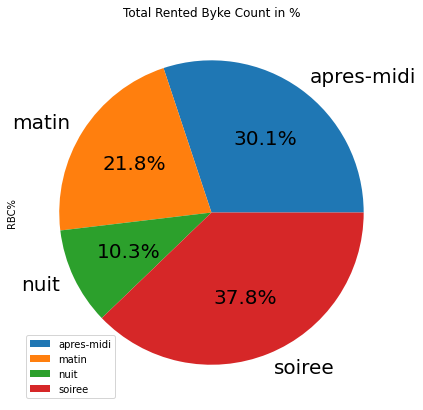

In [ ]:
hours_2.plot.pie(y='RBC%',title='Total Rented Byke Count in %',fontsize=20,autopct='%1.1f%%', figsize=(7,7))
plt.legend(loc="lower left")

La soirée est la partie de la journée qui a le plus de vélos louée (37% des célos loués sont loués en soirée). 
- soirée + aprés-midi = 12h à 24h (la deuxième partie de la journée) représente près de 70% des vélos loués.

## Observons chaque heures séparement
Pas de regroupement d'heure. Observons les 24 heures

In [ ]:
pre_hours1 = sbdata[['Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                     'Rainfall(mm)','Snowfall (cm)','Hour']]
pre_hours2 = sbdata[['Rented Bike Count','Hour']]

In [ ]:
hours_3 =  pre_hours1.groupby(['Hour']).mean()
hours_3['Rented Bike Count'] = pre_hours2.groupby(['Hour']).sum()
hours_3['RBC%'] = (hours_3['Rented Bike Count']/hours_3['Rented Bike Count'].sum())*100
hours_3 = hours_3.sort_values(by='RBC%', ascending=False)

In [ ]:
def color_4hours(x):
  if int(x.name)<6:
    return 'background: lightgreen'
  elif (x.name)<12:
    return 'background: green'
  elif (x.name)<18:
    return 'background: pink'
  else:
    return 'background: red'

hours_3.style.apply(lambda x: [color_4hours(x) for i in x], axis=1)


,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,RBC%
Hour,,,,,,,,,
18,15.300822,50.854795,2.237260,4.327397,0.393562,0.264110,0.051781,548568,8.887558
19,14.280548,54.698630,2.072055,4.570137,0.130411,0.110959,0.057260,436229,7.067511
17,16.254795,47.421918,2.451507,4.067397,0.796904,0.119452,0.046575,415556,6.732580
20,13.389589,57.706849,1.926301,4.652329,0.013589,0.253425,0.060000,390172,6.321325
21,12.745205,60.109589,1.749863,4.699452,0.000000,0.245753,0.060000,376479,6.099479
8,10.176986,66.263014,1.280274,3.790137,0.354959,0.162192,0.100000,370731,6.006354
16,16.896438,44.578082,2.488219,3.686575,1.214904,0.053425,0.045753,339677,5.503236
22,12.207671,62.021918,1.587945,4.710685,0.000000,0.081918,0.059726,336821,5.456965
15,17.036164,43.569863,2.484384,3.483288,1.563753,0.131781,0.052603,302653,4.903396


### ROSE = SOIREE | RO = APRES-MIDI | VERT FONCE = MATIN | VERT CLAIR = NUIT
- On observe bien encore une fois que les heures de la 2eme partie de la journée sont celles qui ont le plus grand nombre de vélos loués.

In [ ]:
def color_2hours(x):
  if(5< int(x.name) <10) or (15< int(x.name) <21):
        return 'background: lightgreen'
  else:
        return 'background: pink'

hours_3.style.apply(lambda x: [color_2hours(x) for i in x], axis=1)

,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,RBC%
Hour,,,,,,,,,
18,15.300822,50.854795,2.237260,4.327397,0.393562,0.264110,0.051781,548568,8.887558
19,14.280548,54.698630,2.072055,4.570137,0.130411,0.110959,0.057260,436229,7.067511
17,16.254795,47.421918,2.451507,4.067397,0.796904,0.119452,0.046575,415556,6.732580
20,13.389589,57.706849,1.926301,4.652329,0.013589,0.253425,0.060000,390172,6.321325
21,12.745205,60.109589,1.749863,4.699452,0.000000,0.245753,0.060000,376479,6.099479
8,10.176986,66.263014,1.280274,3.790137,0.354959,0.162192,0.100000,370731,6.006354
16,16.896438,44.578082,2.488219,3.686575,1.214904,0.053425,0.045753,339677,5.503236
22,12.207671,62.021918,1.587945,4.710685,0.000000,0.081918,0.059726,336821,5.456965
15,17.036164,43.569863,2.484384,3.483288,1.563753,0.131781,0.052603,302653,4.903396


Les heures de migration pendulaire sont plus loués que les autres. (A noté que 6h et 21h sont des heures entre deux qui peuvent être qualifé d'heure de transiton et cela peut en partie explquer leurs ecart avec les autres données.

# DAYS

01/12/2017 : vendredi.

In [ ]:
from datetime import date
import calendar

In [ ]:
dates = pd.to_datetime(sbdata['Date'], dayfirst=True)
sbdata['jour'] = [dates[i].day_name() for i in range(len(dates))]

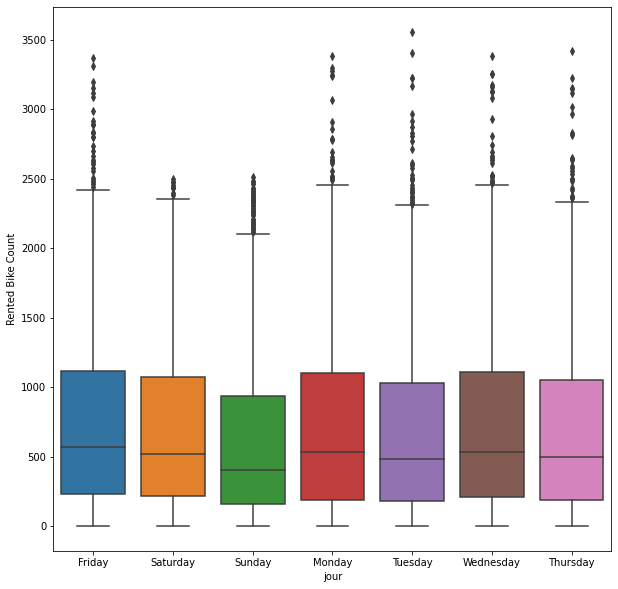

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=sbdata, x='jour', y='Rented Bike Count')

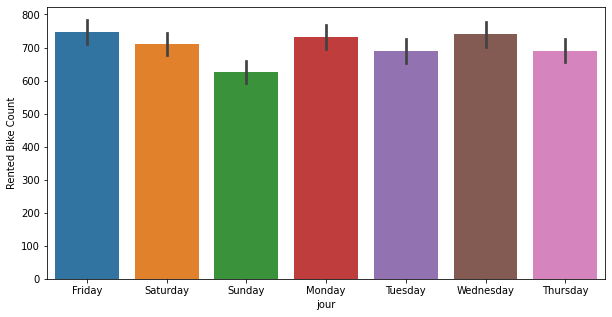

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x='jour', y='Rented Bike Count', data=sbdata)

On observe peu de difference entre les jours de la semaine. Ce resultat est interessant.

## Week Day VS Week End

A Séoul le week-end est comme en France. C'est bien le samedi et dimanche.

In [ ]:
sbdata['week end'] = [ 'yes' if sbdata.iloc[i]['jour'] in ('Saturday','Sunday') else 'non'  for i in range(len(sbdata))]

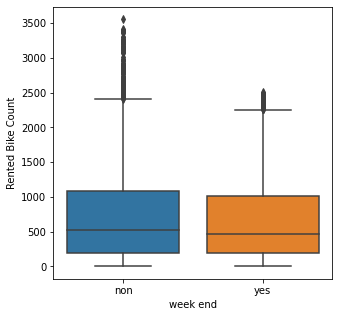

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=sbdata, x='week end', y='Rented Bike Count')

## Week Day vs Hours

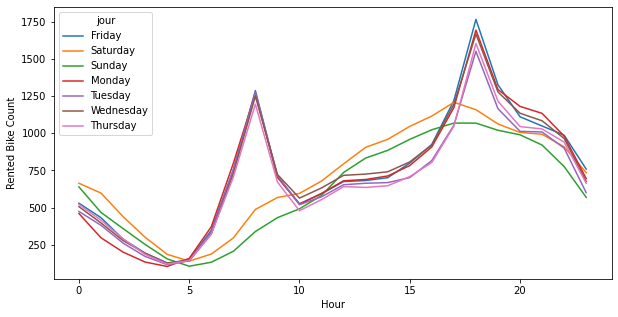

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=sbdata, x='Hour', y='Rented Bike Count', hue='jour', ci=None)

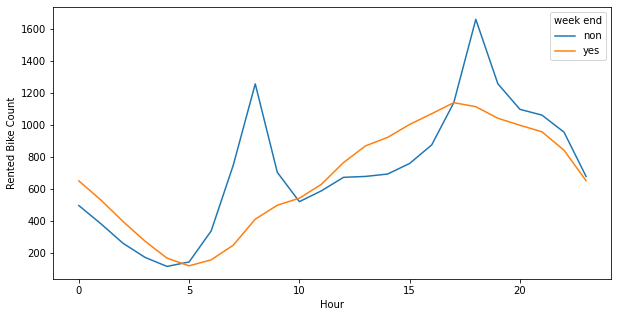

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=sbdata, x='Hour', y='Rented Bike Count', hue='week end', ci=None)

# MOIS

Observons les données en fonction des mois

In [ ]:
sbdata['mois'] = [dates[i].month_name() for i in range(len(dates))]

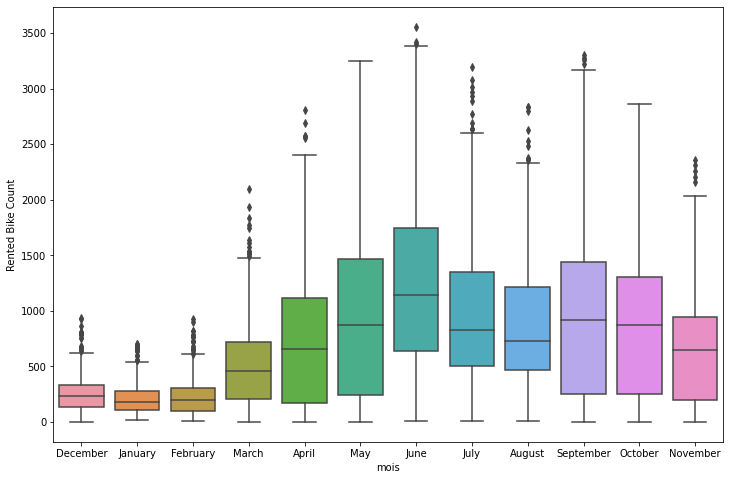

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=sbdata, x='mois', y='Rented Bike Count')

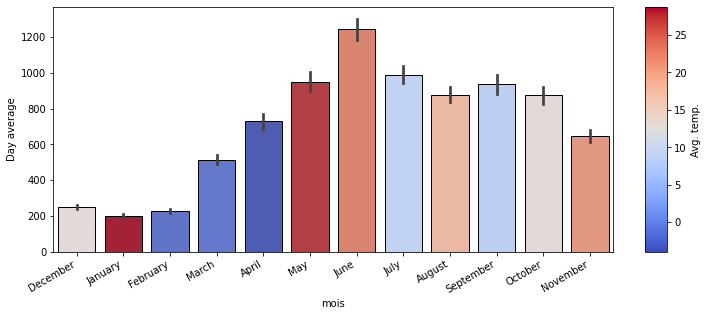

In [ ]:
temp_month = sbdata.groupby(['mois'])['Temperature(°C)'].agg(['mean'])
temp_month_a = 100*(temp_month - temp_month.min())/(temp_month.max() - temp_month.min())
col_pal = sns.color_palette("coolwarm", 101)
colors = []
for x in temp_month_a.round().values.astype(int).T[0]:
    colors.append(col_pal[x])

#plot bars
fig = plt.figure(figsize=(11, 5), facecolor='w', edgecolor='k')
gs = fig.add_gridspec(1, 23)
#Residual vs. fitted
ax1 = fig.add_subplot(gs[0, :21])
ax2 = fig.add_subplot(gs[0, 22])
sns.barplot(x='mois', y='Rented Bike Count', data=sbdata, ax=ax1, palette=colors, edgecolor=(0,0,0))
ax1.set_ylabel("Day average")
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=temp_month.min(), vmax=temp_month.max())
cb1 = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Avg. temp.')
fig.autofmt_xdate()

# DONNEES METEO

Observons les données en fonction des données météorologique. !!! ATTENTION !!! Ces données sont difficilement predictable et imprevisible. De plus les températures peuvent varier d'une année à une autre

In [ ]:
pre_temp1 = sbdata[['Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                     'Rainfall(mm)','Snowfall (cm)']]
pre_temp2 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Temperature(°C)',aggfunc= np.mean)

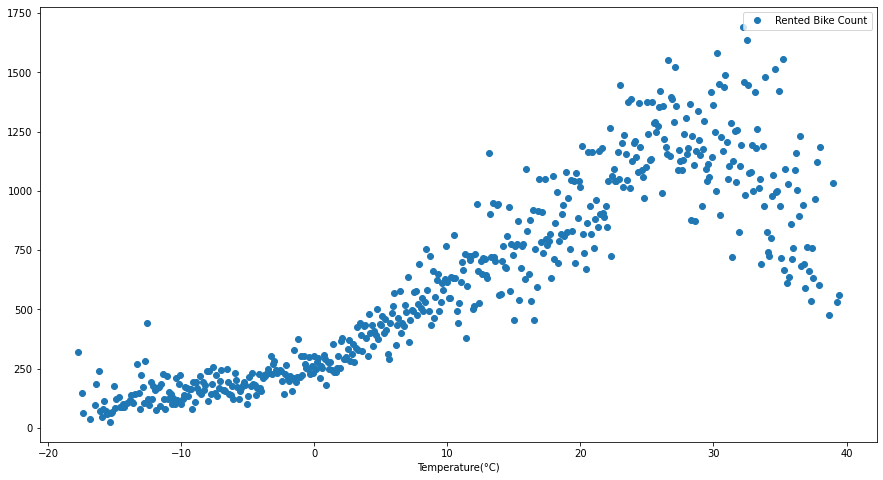

In [ ]:
#data_temperature = sbdata.groupby()
pre_temp2.plot(figsize=(15,8),style='o')

In [ ]:
pre_temp2 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Visibility (10m)',aggfunc= np.mean)

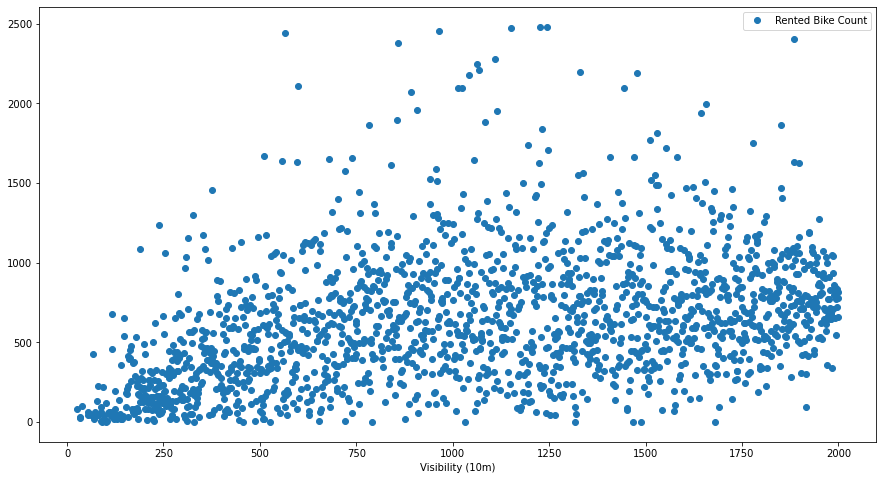

In [ ]:
pre_temp2.plot(figsize=(15,8),style='o')

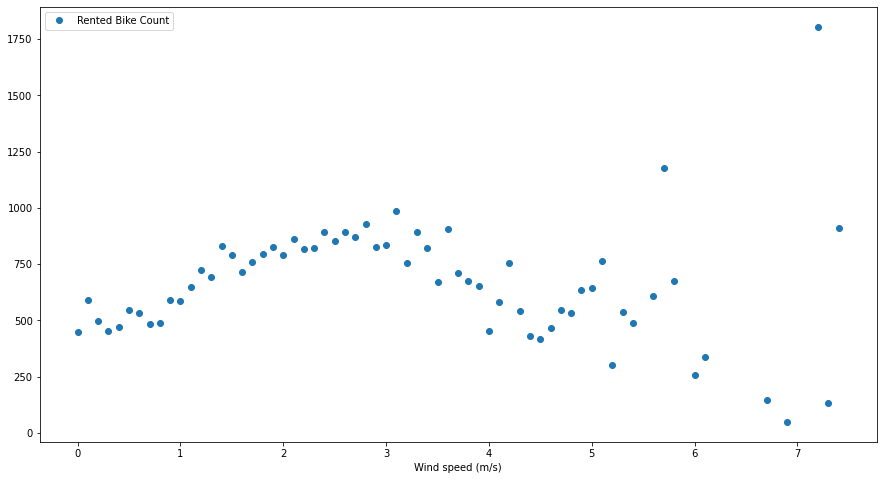

In [ ]:
pre_temp2 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Wind speed (m/s)',aggfunc= np.mean)
pre_temp2.plot(figsize=(15,8),style='o')

In [ ]:
pre_temp2.tail(10) # 7.4 m/s | 7.2 m/s | 5.7 m/s

print(sbdata[sbdata['Wind speed (m/s)']==7.4].shape) #on a bien une seule valeur
print(sbdata[sbdata['Wind speed (m/s)']==7.2].shape) #on a bien une seule valeur
print(sbdata[sbdata['Wind speed (m/s)']==5.7].shape) #on a bien une seule valeur

(1, 14)
(1, 14)
(1, 14)


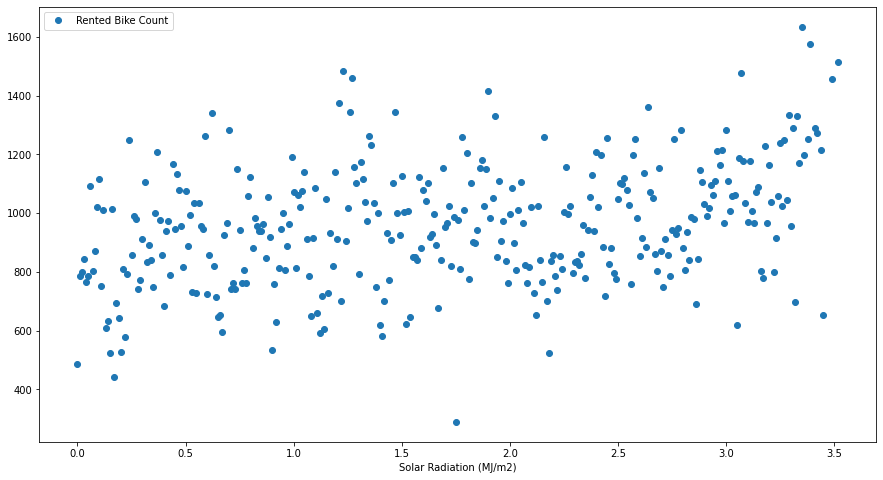

In [ ]:
pre_temp2 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Solar Radiation (MJ/m2)',aggfunc= np.mean)
pre_temp2.plot(figsize=(15,8),style='o')

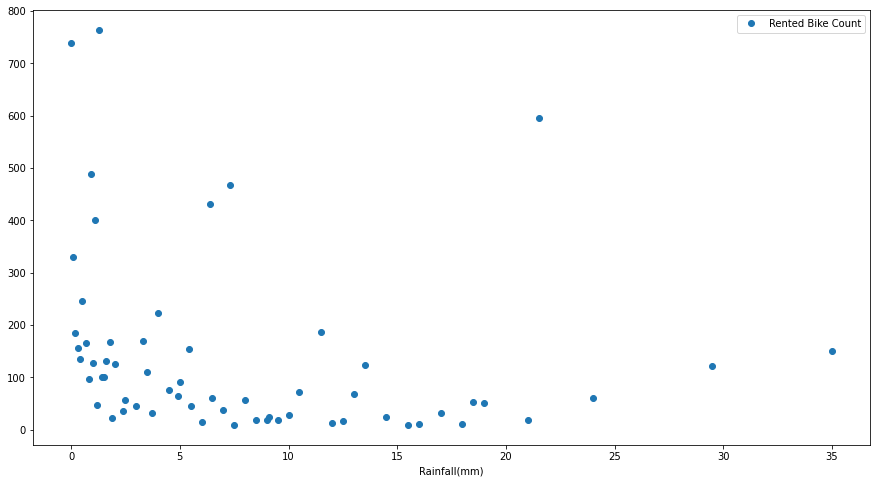

In [ ]:
pre_temp2 = pd.pivot_table(sbdata,values='Rented Bike Count',index='Rainfall(mm)',aggfunc= np.mean)
pre_temp2.plot(figsize=(15,8),style='o')

Ici on observe une courbe. Il y a bien une relation entre le nombre de velos loués et la temprérature

In [ ]:
sbdata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000


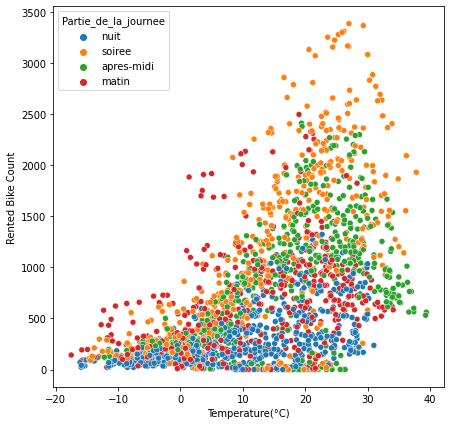

In [ ]:
sbdata_reduc = sbdata.sample(2000)
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=sbdata_reduc, x='Temperature(°C)', y='Rented Bike Count', hue='Partie_de_la_journee')

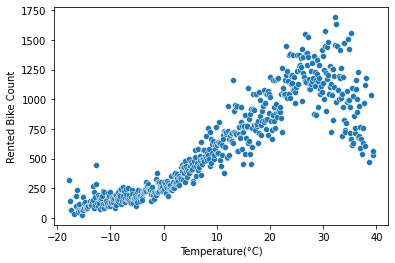

In [ ]:
sns.scatterplot(x=pre_temp2.index,y='Rented Bike Count', data=pre_temp2)

In [ ]:
sbdata[]

,Rented Bike Count
Temperature(°C),
-17.8,322.0
-17.5,145.5
-17.4,64.0
-16.9,36.0
-16.5,96.0
...,...
38.0,1184.0
38.7,475.0
39.0,1033.0
